# Jane Street Market EDA 📖📖📖📖
> Jane Street Market Prediction Kaggle Competition

- toc: true 
- badges: true
- comments: true
- author: Jaekang Lee
- categories: [python, EDA, Jane Street, Kaggle, Visualization, Big Data]

Problem: Maximize profit by choosing to take a trading opportunity or not using 130 anonymized features

### Import Library 📂

In [7]:
#!pip install datatable > /dev/null
import datatable as dt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec
import plotly.express as px
import plotly.graph_objects as go
from collections import defaultdict
# garbage collector to keep RAM in check
import gc 
%matplotlib inline

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

### Import Data 📚

In [10]:
# df = pd.read_csv("../input/jane-street-market-prediction/train.csv")
df = dt.fread('../../../Kaggle/Jane-Street-Market-Prediction/input/train.csv')
df = df.to_pandas()

In [11]:
feat = pd.read_csv("../../../Kaggle/Jane-Street-Market-Prediction/input/features.csv")

In [12]:
#hide_input
print("df.shape: " + str(df.shape))
print("how many days? " + str(len(df.date.unique())) + "days")
df.head()

df.shape: (2390491, 138)
how many days? 500days


,date,weight,resp_1,resp_2,resp_3,resp_4,resp,feature_0,feature_1,feature_2,...,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,ts_id
0,0,0.000000,0.009916,0.014079,0.008773,0.001390,0.006270,1,-1.872746,-2.191242,...,NaN,1.168391,8.313583,1.782433,14.018213,2.653056,12.600292,2.301488,11.445807,0
1,0,16.673515,-0.002828,-0.003226,-0.007319,-0.011114,-0.009792,-1,-1.349537,-1.704709,...,NaN,-1.178850,1.777472,-0.915458,2.831612,-1.417010,2.297459,-1.304614,1.898684,1
2,0,0.000000,0.025134,0.027607,0.033406,0.034380,0.023970,-1,0.812780,-0.256156,...,NaN,6.115747,9.667908,5.542871,11.671595,7.281757,10.060014,6.638248,9.427299,2
3,0,0.000000,-0.004730,-0.003273,-0.000461,-0.000476,-0.003200,-1,1.174378,0.344640,...,NaN,2.838853,0.499251,3.033732,1.513488,4.397532,1.266037,3.856384,1.013469,3
4,0,0.138531,0.001252,0.002165,-0.001215,-0.006219,-0.002604,1,-3.172026,-3.093182,...,NaN,0.344850,4.101145,0.614252,6.623456,0.800129,5.233243,0.362636,3.926633,4


In [13]:
df.describe()

,date,weight,resp_1,resp_2,resp_3,resp_4,resp,feature_0,feature_1,feature_2,...,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,ts_id
count,2.390491e+06,2.390491e+06,2.390491e+06,2.390491e+06,2.390491e+06,2.390491e+06,2.390491e+06,2.390491e+06,2.390491e+06,2.390491e+06,...,2.320637e+06,2.390268e+06,2.390268e+06,2.374408e+06,2.374408e+06,2.381638e+06,2.381638e+06,2.388570e+06,2.388570e+06,2.390491e+06
mean,2.478668e+02,3.031535e+00,1.434969e-04,1.980749e-04,2.824183e-04,4.350201e-04,4.083113e-04,9.838565e-03,3.855776e-01,3.576875e-01,...,2.687757e-01,3.435523e-01,2.799973e-01,3.351537e-01,2.448752e-01,3.391778e-01,2.323809e-01,3.425608e-01,2.456182e-01,1.195245e+06
std,1.522746e+02,7.672794e+00,8.930163e-03,1.230236e-02,1.906882e-02,3.291224e-02,2.693609e-02,9.999518e-01,2.559373e+00,2.477335e+00,...,2.174238e+00,2.087842e+00,1.977643e+00,1.742587e+00,2.242853e+00,2.534498e+00,1.795854e+00,2.307130e+00,1.765419e+00,6.900755e+05
min,0.000000e+00,0.000000e+00,-3.675043e-01,-5.328334e-01,-5.681196e-01,-5.987447e-01,-5.493845e-01,-1.000000e+00,-3.172026e+00,-3.093182e+00,...,-7.471971e+00,-5.862979e+00,-6.029281e+00,-4.080720e+00,-8.136407e+00,-8.215050e+00,-5.765982e+00,-7.024909e+00,-5.282181e+00,0.000000e+00
25%,1.040000e+02,1.617400e-01,-1.859162e-03,-2.655044e-03,-5.030704e-03,-9.310415e-03,-7.157903e-03,-1.000000e+00,-1.299334e+00,-1.263628e+00,...,-1.123252e+00,-1.114326e+00,-9.512009e-01,-9.133750e-01,-1.212124e+00,-1.452912e+00,-8.993050e-01,-1.278341e+00,-8.544535e-01,5.976225e+05
50%,2.540000e+02,7.086770e-01,4.552665e-05,6.928179e-05,1.164734e-04,1.222579e-04,8.634997e-05,1.000000e+00,-1.870182e-05,-7.200577e-07,...,0.000000e+00,7.006244e-17,6.054629e-17,4.870826e-17,-2.558675e-16,1.015055e-16,5.419920e-17,8.563069e-17,4.869529e-17,1.195245e+06
75%,3.820000e+02,2.471791e+00,2.097469e-03,2.939111e-03,5.466336e-03,9.804649e-03,7.544347e-03,1.000000e+00,1.578417e+00,1.526399e+00,...,1.342829e+00,1.405926e+00,1.308625e+00,1.228277e+00,1.409687e+00,1.767275e+00,1.111491e+00,1.582633e+00,1.125321e+00,1.792868e+06
max,4.990000e+02,1.672937e+02,2.453477e-01,2.949339e-01,3.265597e-01,5.113795e-01,4.484616e-01,1.000000e+00,7.442989e+01,1.480763e+02,...,1.107771e+02,4.812516e+01,1.276908e+02,6.514517e+01,7.052807e+01,5.872849e+01,6.932221e+01,5.119038e+01,1.164568e+02,2.390490e+06


In [14]:
feat.describe()

,feature,tag_0,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,...,tag_19,tag_20,tag_21,tag_22,tag_23,tag_24,tag_25,tag_26,tag_27,tag_28
count,130,130,130,130,130,130,130,130,130,130,...,130,130,130,130,130,130,130,130,130,130
unique,130,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,feature_25,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,1,113,113,113,113,113,122,90,128,128,...,123,125,125,121,82,118,118,118,118,118


### Cleaning Data 🧹

Problem: Maximize profit by choosing to take a trading opportunity or not using 130 anonymized features

In [9]:
#hide_input
has_nulls = set(df.columns[df.isnull().sum()!=0])
print("There are "+str(len(has_nulls))+" many cols with at least one null value")
print(has_nulls)

There are 88 many cols with at least one null value
{'feature_108', 'feature_91', 'feature_115', 'feature_128', 'feature_93', 'feature_33', 'feature_24', 'feature_4', 'feature_79', 'feature_28', 'feature_19', 'feature_88', 'feature_56', 'feature_117', 'feature_31', 'feature_21', 'feature_7', 'feature_94', 'feature_16', 'feature_76', 'feature_96', 'feature_12', 'feature_55', 'feature_29', 'feature_120', 'feature_35', 'feature_124', 'feature_32', 'feature_74', 'feature_17', 'feature_116', 'feature_97', 'feature_86', 'feature_105', 'feature_127', 'feature_36', 'feature_99', 'feature_34', 'feature_104', 'feature_10', 'feature_100', 'feature_58', 'feature_87', 'feature_111', 'feature_122', 'feature_80', 'feature_78', 'feature_25', 'feature_18', 'feature_59', 'feature_26', 'feature_73', 'feature_92', 'feature_15', 'feature_81', 'feature_27', 'feature_13', 'feature_112', 'feature_109', 'feature_125', 'feature_3', 'feature_98', 'feature_82', 'feature_84', 'feature_45', 'feature_90', 'feature_9

A lot of the histogram with null values has extreme outliers. It would be safe to fill the null values with medians. Other imputation method considered were mean and KNN-Imputation. Check out my other notebook where KNN-Imputation was used to train MLP.


feature with most nans: feature_27, with 395535


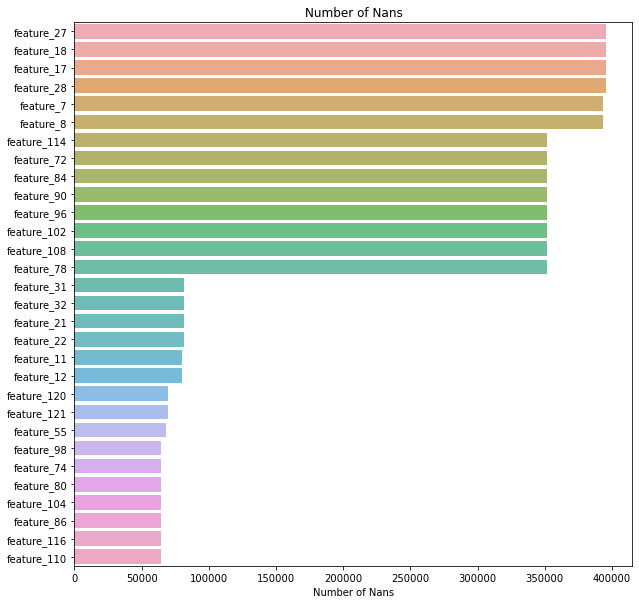

In [21]:
#hide_input
nan_count = df.isna().sum()[df.isna().sum() > 0].sort_values(ascending=False)
print("feature with most nans: feature_27 with " + str(nan_count[0]))
fig, axs = plt.subplots(figsize=(10, 10))
sns.barplot(y = nan_count.index[0:30], 
            x = nan_count.values[0:30], 
            alpha = 0.8
           )
plt.title('Number of Nans')
plt.xlabel('Number of Nans')
plt.show()

If we just remove all nans, we would be removing more than 16.54% of the dataset.

In [ ]:
#hide_input
df = df.apply(lambda x: x.fillna(x.median()),axis=0)
print("Number of features with null values after median imputation: ",np.sum(df.isna().sum()>0))

Interesting points so far:
- feature_0 is binary.
- A lot of features seems to be normally distributed.
- A lot of missing values. 

### Plots & Visualization 📊

#### resp, resp_1, resp_2, resp_3, resp_4

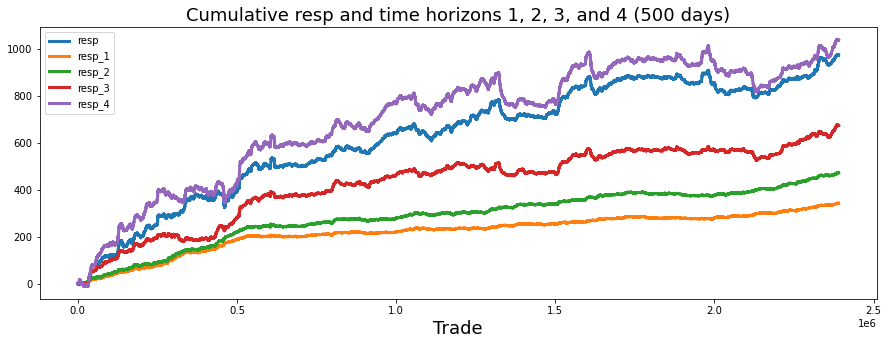

In [25]:
#hide_input
fig, ax = plt.subplots(figsize=(15, 5))
balance= pd.Series(df['resp']).cumsum()
resp_1= pd.Series(df['resp_1']).cumsum()
resp_2= pd.Series(df['resp_2']).cumsum()
resp_3= pd.Series(df['resp_3']).cumsum()
resp_4= pd.Series(df['resp_4']).cumsum()
ax.set_xlabel ("Trade", fontsize=18)
ax.set_title ("Cumulative resp and time horizons 1, 2, 3, and 4 (500 days)", fontsize=18)
balance.plot(lw=3)
resp_1.plot(lw=3)
resp_2.plot(lw=3)
resp_3.plot(lw=3)
resp_4.plot(lw=3)
plt.legend(loc="upper left")
del resp_1
del resp_2
del resp_3
del resp_4
gc.collect();

We can see that resp is closely related to resp_4 (blue and purple). Resp_1 and resp_2 also seem to be closely related but much much linear. Resp_3 seem to be in the middle, where the shape is closer to upper group but position is slightly closer to green and orange.

#### Weights

Note: **weight** and **resp** multiplied together represents a return on the trade.

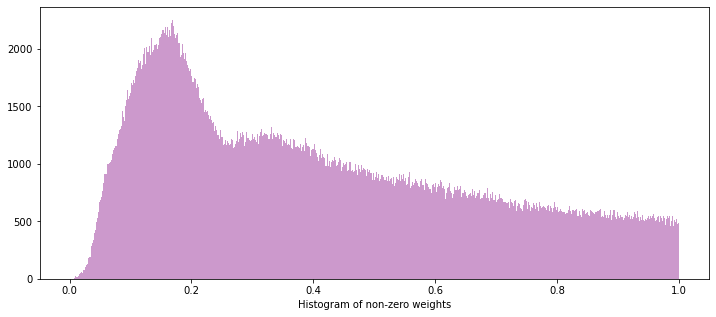

In [11]:
#hide_input
plt.figure(figsize = (12,5))
ax = sns.distplot(df['weight'], 
             bins=1000, 
             kde_kws={"clip":(0.001,1)}, 
             hist_kws={"range":(0.001,1)},
             color='purple', 
             kde=False);
values = np.array([rec.get_height() for rec in ax.patches])
norm = plt.Normalize(values.min(), values.max())
plt.xlabel("Histogram of non-zero weights", size=10)
plt.show();
del values
gc.collect();

We can see that most weights are around 0.2 and we can see two 'peaks' which is around 0.2 and 0.3. Note that maximum weight was 167.29 represented by 1.0 on x-axis. Thus 0.2 represents around 33.458 and 0.3 represents around 50.187.

2921

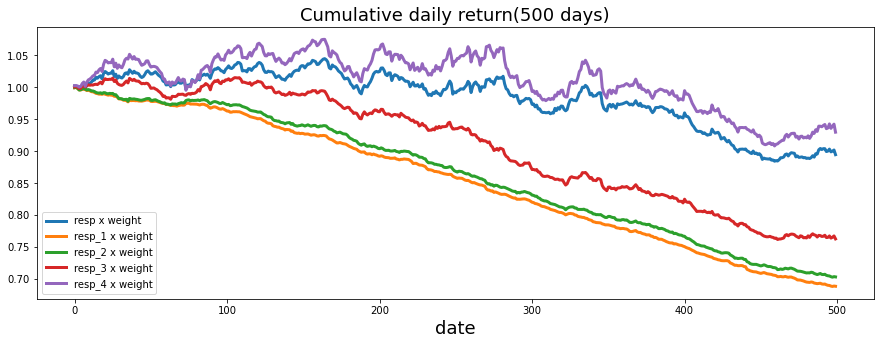

In [9]:
#hide_input
df['weight_resp']   = df['weight']*df['resp']
df['weight_resp_1'] = df['weight']*df['resp_1']
df['weight_resp_2'] = df['weight']*df['resp_2']
df['weight_resp_3'] = df['weight']*df['resp_3']
df['weight_resp_4'] = df['weight']*df['resp_4']

fig, ax = plt.subplots(figsize=(15, 5))
resp    = pd.Series(1+(df.groupby('date')['weight_resp'].mean())).cumprod()
resp_1  = pd.Series(1+(df.groupby('date')['weight_resp_1'].mean())).cumprod()
resp_2  = pd.Series(1+(df.groupby('date')['weight_resp_2'].mean())).cumprod()
resp_3  = pd.Series(1+(df.groupby('date')['weight_resp_3'].mean())).cumprod()
resp_4  = pd.Series(1+(df.groupby('date')['weight_resp_4'].mean())).cumprod()
ax.set_xlabel ("Day", fontsize=18)
ax.set_title ("Cumulative daily return(500 days)", fontsize=18)
resp.plot(lw=3, label='resp x weight')
resp_1.plot(lw=3, label='resp_1 x weight')
resp_2.plot(lw=3, label='resp_2 x weight')
resp_3.plot(lw=3, label='resp_3 x weight')
resp_4.plot(lw=3, label='resp_4 x weight')
plt.legend(loc="lower left")
del resp_1
del resp_2
del resp_3
del resp_4
gc.collect()

Note that the graph plots all the positive gains. (Our 1's for our action column). So we can see that there were 'bigger' gains in the beginning and as time approach 500, the gain becomes smaller. In conclusion, the earlier trades are much bigger but we don't know what it's going to be like in our competition test set. 

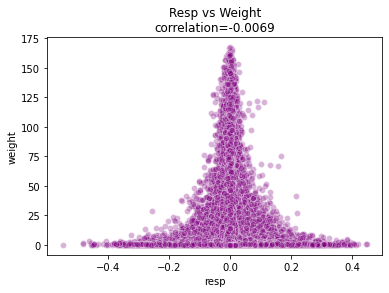

In [12]:
#hide_input
sns.scatterplot(data=df, x='resp',y='weight', color= 'purple', alpha=.3)
plt.title('Resp vs Weight\ncorrelation={}'.format(round(df.weight.corr(df.resp),4)));

We know that we probability want to invest more 'weight' if there are bigger 'resp'(return). We learn here that higher weights are only when resp is close to 0. In other words, it is dumb to trade if resp is away from 0 but it is safe to invest even a lot if it is near 0.

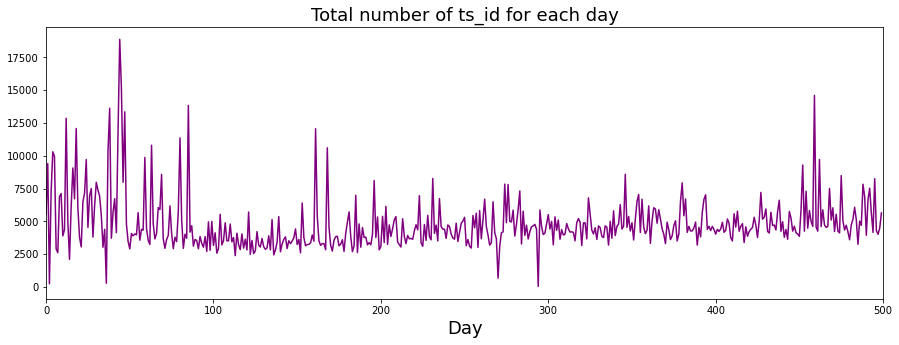

74963

In [13]:
#hide_input
trades_per_day = df.groupby(['date'])['ts_id'].count()
fig, ax = plt.subplots(figsize=(15, 5))
plt.plot(trades_per_day, color="purple")
ax.set_xlabel ("Day", fontsize=18)
ax.set_title ("Total number of ts_id for each day", fontsize=18)
ax.set_xlim(xmin=0)
ax.set_xlim(xmax=500)
plt.show()
gc.collect()

In the Kaggle community, there's been lots of discussion on how the trends changed significantly since day ~85. We can see much more trades happening before day 100. Rest of the days are still very active but not as noisy. We can suggest that there has been a change of trading model from Jane Street as discussed [here](https://www.kaggle.com/c/jane-street-market-prediction/discussion/201930) by [Carl](https://www.kaggle.com/carlmcbrideellis).

Let us look at the most important feature, 'feature_0'

In [14]:
df['feature_0'].value_counts()

 1    1207005
-1    1183486
Name: feature_0, dtype: int64

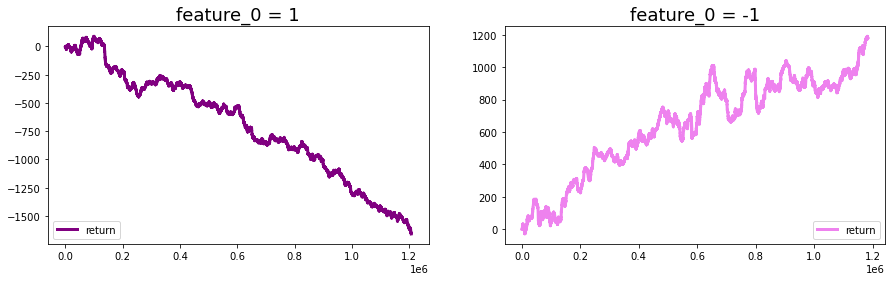

In [15]:
#hide_input
feature_0_is_plus_one  = df.query('feature_0 ==  1').reset_index(drop = True)
feature_0_is_minus_one = df.query('feature_0 == -1').reset_index(drop = True)
# the plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))
ax1.plot((pd.Series(feature_0_is_plus_one['resp']*feature_0_is_plus_one['weight']).cumsum()), lw=3, label='return', color="purple")
ax2.plot((pd.Series(feature_0_is_minus_one['resp']*feature_0_is_minus_one['weight']).cumsum()), lw=3, label='return', color="violet")
ax1.set_title ("feature_0 = 1", fontsize=18)
ax2.set_title ("feature_0 = -1", fontsize=18)
ax1.legend(loc="lower left")
ax2.legend(loc="lower right");

del feature_0_is_plus_one
del feature_0_is_minus_one
gc.collect();

Interestingly, when feature_0 is 1, plot shows negative slope while in contrast, when feature_0 is -1, plot shows positive slope. My guess is that feature_0 corresponds to Buy(1) and Sell(-1) or vice versa. So if we set action to 1 with feature_0 = 1 then we are selling and when we set action to 0 with feature_0 = -1, then we are buying. This makes sense since whether we are buying or selling we can still lose or gain profit.

#### Features

Remember that we have another file called features.csv. Which can help us understand 100+ features and maybe cluster into groups. Let's take a look. <br>
<img src="images/tags.png" style="width:800px;height:450px;">

In [1]:
#hide_input
# fig = px.bar(feat.set_index('feature').T.sum(), title='Number of tags for each feature')

# fig.layout.xaxis.tickangle = 300
# fig.update_traces( showlegend = False)
# fig.layout.xaxis. dtick = 5
# fig.layout.xaxis.title = ''
# fig.layout.yaxis.title = ''
# fig.show()

Let us see what tag_0 groups tells us.

<img src="images/corr_jane.png" style="width:900px;height:770px;">

Correlation between features of tag_0. It looks like there certainly are correlation between elements of the group except a few.

Interesting points:
- feature_0 has no tags
- feature 79 to 119 all has 4 tags
- feature 7 to 36 have 3 and 4 tags periodically
- Similar trend between 2 to 7, 37 to 40, 120 to 129
- tag_n doesn't tell too much about the features

### Reference 📖
- [Jane Street: EDA of day 0 and feature importance](https://www.kaggle.com/carlmcbrideellis/jane-street-eda-of-day-0-and-feature-importance)
- [Jane_street_Extensive_EDA & PCA starter 📊⚡](https://www.kaggle.com/muhammadmelsherbini/jane-street-extensive-eda-pca-starter)
- [EDA / A Quant's Prespective](https://www.kaggle.com/hamzashabbirbhatti/eda-a-quant-s-prespective#Weight)

### Submission

In another notebook. Thoughts going into predicting phase.
1. Days before ~100 can be dropped as suspicion of model shift.
2. Feature_0 seem very important to find slope of cummulative resp.
3. Resp near 0 is prefered over other values.
4. A lot of features are normally distributed.
5. We have over 2 million datas, it would be safe to add lot more features(feature enginerring)
6. There are a lot of missing values too. Can try mean, median or KNN imputation methods.
7. Note that although this is kind of a time series data, we can only predict with features 0 to 129
